In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks, peak_widths
from scipy.signal import argrelextrema, argrelmax, argrelmin
import dask.dataframe


col='vhee'
energy='100 MV'
hist="1M"
CSD=5.0
x=np.arange(-.995,.995+0.01,0.01)



data03=pd.read_csv("D:Desktop/SFRT-Topas/vhee/vhee_bestopt_airgap/results/dosetomedium_vhee_bestopt2cm_100MV__350.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])


data03.dose=(data03.dose*4.5)/(1.60218*10**-19); #4.5 amps




In [24]:
dose03_1=np.zeros((200,200));dose03_2=np.zeros((200,200));dose03_3=np.zeros((200,200));dose03_4=np.zeros((200,200))
dose03_5=np.zeros((200,200));dose03_6=np.zeros((200,200));dose03_7=np.zeros((200,200));dose03_8=np.zeros((200,200))
dose03_9=np.zeros((200,200));dose03_10=np.zeros((200,200));dose03_11=np.zeros((200,200));dose03_12=np.zeros((200,200))
dose03_13=np.zeros((200,200));dose03_14=np.zeros((200,200));dose03_15=np.zeros((200,200));dose03_16=np.zeros((200,200))
dose03_17=np.zeros((200,200));dose03_18=np.zeros((200,200));dose03_19=np.zeros((200,200));dose03_20=np.zeros((200,200))



for i in np.arange(0,len(data03.dose),20):
    dose03_1[data03.x[i]][data03.y[i]]=data03.dose[i]
    dose03_2[data03.x[i+1]][data03.y[i+1]]=data03.dose[i+1]
    dose03_3[data03.x[i+2]][data03.y[i+2]]=data03.dose[i+2]
    dose03_4[data03.x[i+3]][data03.y[i+3]]=data03.dose[i+3]
    dose03_5[data03.x[i+4]][data03.y[i+4]]=data03.dose[i+4]
    dose03_6[data03.x[i+5]][data03.y[i+5]]=data03.dose[i+5]
    dose03_7[data03.x[i+6]][data03.y[i+6]]=data03.dose[i+6]
    dose03_8[data03.x[i+7]][data03.y[i+7]]=data03.dose[i+7]
    dose03_9[data03.x[i+8]][data03.y[i+8]]=data03.dose[i+8]
    dose03_10[data03.x[i+9]][data03.y[i+9]]=data03.dose[i+9]
    dose03_11[data03.x[i+10]][data03.y[i+10]]=data03.dose[i+10]
    dose03_12[data03.x[i+11]][data03.y[i+11]]=data03.dose[i+11]
    dose03_13[data03.x[i+12]][data03.y[i+12]]=data03.dose[i+12]
    dose03_14[data03.x[i+13]][data03.y[i+13]]=data03.dose[i+13]
    dose03_15[data03.x[i+14]][data03.y[i+14]]=data03.dose[i+14]
    dose03_16[data03.x[i+15]][data03.y[i+15]]=data03.dose[i+15]
    dose03_17[data03.x[i+16]][data03.y[i+16]]=data03.dose[i+16]
    dose03_18[data03.x[i+17]][data03.y[i+17]]=data03.dose[i+17]
    dose03_19[data03.x[i+18]][data03.y[i+18]]=data03.dose[i+18]
    dose03_20[data03.x[i+19]][data03.y[i+19]]=data03.dose[i+19]



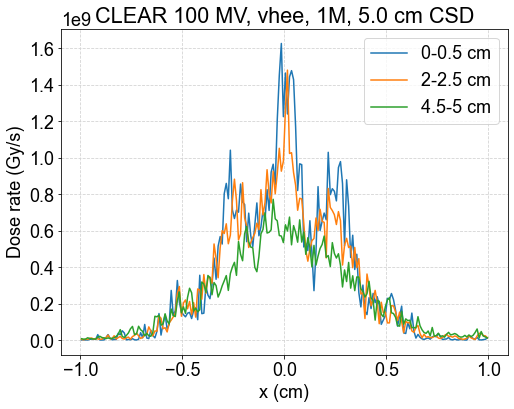

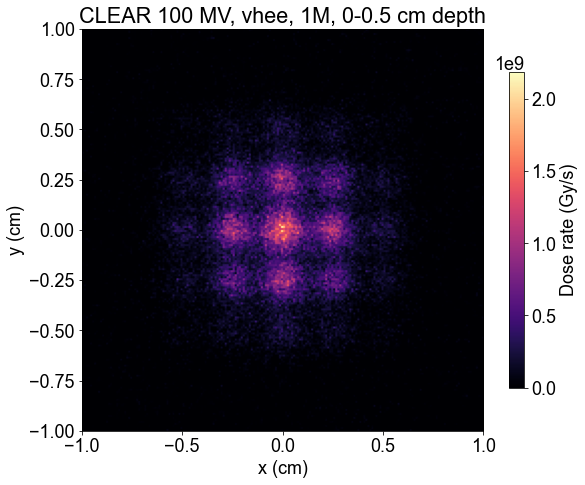

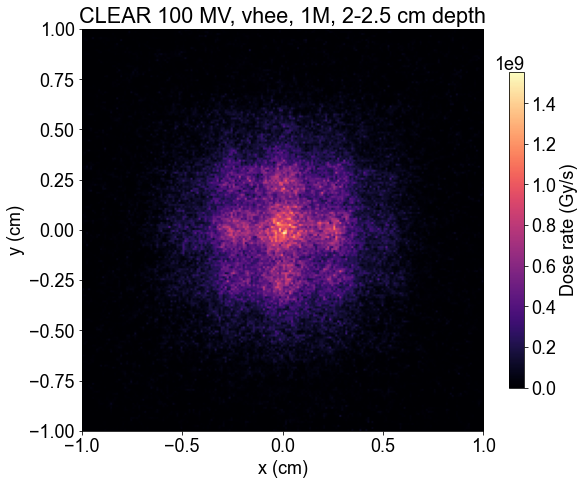

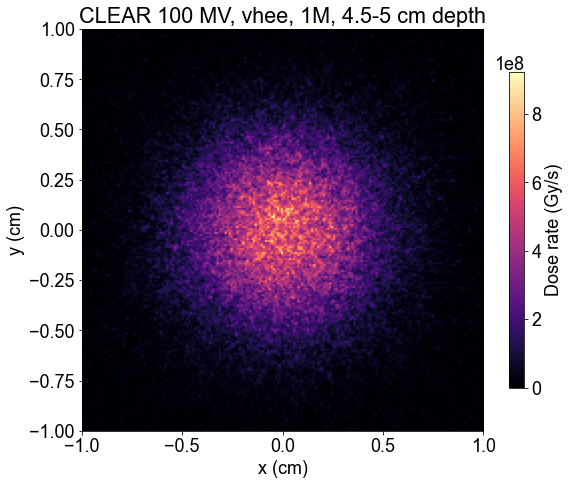

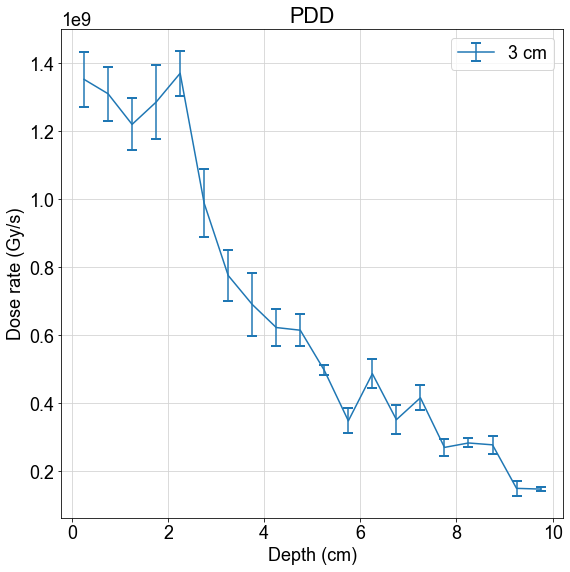

In [25]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

doses03=[dose03_1,dose03_2,dose03_3,dose03_4,dose03_5,dose03_6,dose03_7,dose03_8,dose03_9,dose03_10,dose03_11,dose03_12,dose03_13,dose03_14,dose03_15,dose03_16,dose03_17,dose03_18,dose03_19,dose03_20]

profile03_1=(dose03_1.T[100]+dose03_1.T[101])/2
profile03_2=(dose03_5.T[100]+dose03_5.T[101])/2
profile03_3=(dose03_10.T[100]+dose03_10.T[101])/2




figure(1,figsize=(8,6))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', '+str(CSD)+' cm CSD')
plt.plot(x,profile03_1,label='0-0.5 cm')
#plt.plot(x,profile05_1,label='5 cm')
plt.plot(x,profile03_2,label='2-2.5 cm')
#plt.plot(x,profile09_1,label='9 cm')
plt.plot(x,profile03_3,label='4.5-5 cm')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('Dose rate (Gy/s)')
plt.grid(c='lightgray',ls='--')





figure(4,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 0-0.5 cm depth')
plt.imshow(dose03_1,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(5,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 2-2.5 cm depth')
plt.imshow(dose03_5,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

figure(6,figsize=(9,8))
plt.title('CLEAR '+str(energy)+', '+col+', '+str(hist)+', 4.5-5 cm depth')
plt.imshow(dose03_10,cmap='magma',extent=(-1,1,-1,1))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose rate (Gy/s)')

depths=np.arange(0.25,10,0.5)
PDD03=[];
PDD03_err=[];
for d in np.arange(0,len(doses03)):
    arr03=[]
    arr03=[doses03[d][100][100],doses03[d][101][100],doses03[d][100][101],doses03[d][101][101]]
    PDD03.append(np.mean(arr03))
    PDD03_err.append(np.std(arr03)/2)
    
figure(7,figsize=(9,9))
plt.title('PDD')
plt.errorbar(depths,PDD03,yerr=PDD03_err,capsize=5,capthick=2,label='3 cm')
plt.ylabel('Dose rate (Gy/s)')
plt.xlabel('Depth (cm)')
plt.legend()
plt.grid(c='lightgray')

PDD100MV=[PDD03,PDD03_err]

# np.save('D:Desktop/SFRT-Topas/vhee/vhee_bestopt/results/PDD100MV.npy',PDD100MV)

In [26]:
# pvdr100MV=[pvdr,pvdr_error]
# peak100MV=[mean_peaks,peak_error]

# np.save('D:Desktop/SFRT-Topas/vhee/vhee_bestopt/results/pvdr100MV.npy',pvdr100MV)
# np.save('D:Desktop/SFRT-Topas/vhee/vhee_bestopt/results/peak100MV.npy',peak100MV)